### Telecom churn
Here we have a dataset, in which we have given details of customers who have left the telecomunnication service we have to predict what are the main reasons/features due to which the customer has left the service.

In [1]:
#Import all Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [2]:
tc=pd.read_csv('telecom_churn.csv')
tc.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1330,0661-WCQNQ,Male,0,Yes,No,22,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,Yes,Credit card (automatic),56.25,1292.2,No
3845,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,Yes
4741,6583-KQJLK,Female,1,Yes,No,15,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.65,1285.05,No
5452,3026-ATZYV,Female,0,Yes,Yes,37,Yes,No,DSL,Yes,...,No,No,Yes,Yes,One year,No,Bank transfer (automatic),75.10,2658.8,No
5211,8382-SHQEH,Female,0,Yes,No,8,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.90,764.95,Yes
6127,6198-PNNSZ,Female,0,Yes,No,56,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),109.80,6109.65,No
1585,4522-XRWWI,Male,0,Yes,No,42,Yes,Yes,DSL,Yes,...,No,Yes,Yes,Yes,One year,No,Credit card (automatic),80.45,3375.9,No
4772,5795-BKOYE,Female,0,Yes,Yes,69,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),59.10,4134.7,No
4926,0440-EKDCF,Male,0,Yes,No,62,Yes,No,DSL,No,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),60.15,3753.2,No
3098,4248-HCETZ,Male,1,Yes,No,30,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,79.65,2365.15,Yes


In [3]:
#To remove customerID from Dataset permanently
tc.drop(['customerID','gender'],axis=1,inplace=True)

In [4]:
tc.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#to check null values
tc.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

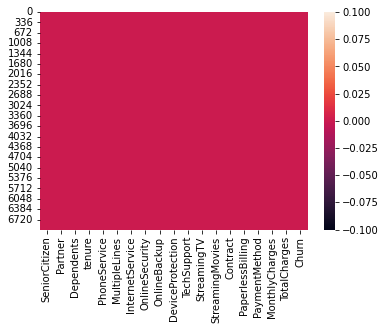

In [6]:
sns.heatmap(tc.isnull())

In [7]:
#to check datatypes
tc.dtypes

SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
print(tc['TotalCharges'].unique())

['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [9]:
c=0
for index,data in enumerate(tc['TotalCharges']):
    if (data.isspace()):
        c=c+1
        print(index," ",data)
print(c)

488    
753    
936    
1082    
1340    
3331    
3826    
4380    
5218    
6670    
6754    
11


In [10]:
tc['TotalCharges'].replace(" ",np.nan,inplace=True)

In [11]:
tc.isnull().sum()

SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
tc['TotalCharges'].replace(np.nan, 0,inplace=True)

In [13]:
tc.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
#to change the datatype of normalised-losses from object to float
tc['TotalCharges']=tc['TotalCharges'].astype("float")
tc.dtypes

SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
tc['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

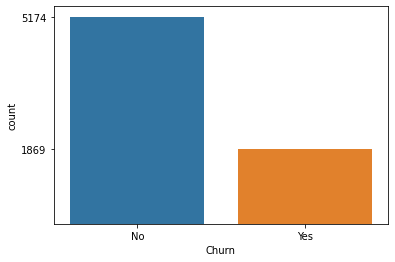

In [16]:
#visualisation
sns.countplot(data=tc,x='Churn')
f=tc['Churn'].value_counts()
plt.yticks(f)
plt.show()

In [17]:
#Separate object type data and numeric type data from dataset df
df_num=tc.select_dtypes(['float64','int64'])
df_cat=tc.select_dtypes('object')

In [18]:
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [19]:
df_cat

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [20]:
#Apply LabelEncoder for converting object type data into numeric data
from sklearn.preprocessing import LabelEncoder
column=df_cat.columns
print(column)
for col in column:
    #create object of LabelEncoder class
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

Index(['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [21]:
df_cat.dtypes

Partner             int32
Dependents          int32
PhoneService        int32
MultipleLines       int32
InternetService     int32
OnlineSecurity      int32
OnlineBackup        int32
DeviceProtection    int32
TechSupport         int32
StreamingTV         int32
StreamingMovies     int32
Contract            int32
PaperlessBilling    int32
PaymentMethod       int32
Churn               int32
dtype: object

In [22]:
df_new=pd.concat([df_num,df_cat],axis=1)
df_new.dtypes

SeniorCitizen         int64
tenure                int64
MonthlyCharges      float64
TotalCharges        float64
Partner               int32
Dependents            int32
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
Churn                 int32
dtype: object

In [23]:
df_new.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


### we will keep our input and output in X and Y variables to process using Various algorithms.

In [24]:
X=df_new.drop("Churn",axis=1) #input select
Y=df_new['Churn'] #output

In [25]:
#Train_test_split(70%,30%)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [26]:
#Apply Standard Scaler on X_train and X_test input data
from sklearn.preprocessing import StandardScaler
#create object of StanderdScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

### Logistic Regression

In [27]:
#Baseline model wirh LogisticRegression : because classification algo.
from sklearn.linear_model import LogisticRegression

In [28]:
#create object of LogisiticRegression class
lr=LogisticRegression()

In [29]:
#RandomOverSampler : inbuilt class : to increase means create duplicate 
#records of minority class which equal to majority class
from imblearn.over_sampling import RandomOverSampler
#Apply RandomOverSampler 
#first create the object of class RamdomOverSampler
ros=RandomOverSampler()

In [30]:
X_train1,Y_train1=ros.fit_resample(X_train,Y_train)
X_test1,Y_test1=ros.fit_resample(X_test,Y_test)
#here make a duplicate record from existing record of minority class

In [31]:
#train the model with 70% data
lr.fit(X_train1,Y_train1)

LogisticRegression()

In [32]:
#Test the model with 30% data
Y_pred=lr.predict(X_test1)

In [33]:
#generate record 
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test1,Y_pred))
print(confusion_matrix(Y_test1,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1585
           1       0.75      0.82      0.78      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170

[[1151  434]
 [ 293 1292]]


In [34]:
#As we see the recall score is good but we will check our dataset using 
#other algorithms so that we can finalise which algorithm is the best to train the model.

### Decision Tree

In [35]:
#perform dataset with the help of DecisionTreeClassifier
#call DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier

In [36]:
#create object of DecisionTreeClassifier class
dt=DecisionTreeClassifier()   #by default gini index method

In [37]:
#train the model with 70%
dt.fit(X_train1,Y_train1)

DecisionTreeClassifier()

In [38]:
#show the information gain of all input features, use inbuilt method
#feature_importances_ of DecisionTreeClassifier
dt.feature_importances_

array([0.01362606, 0.12016089, 0.21904118, 0.16535932, 0.01675597,
       0.02119474, 0.        , 0.01951827, 0.0146513 , 0.03611954,
       0.01920195, 0.01477497, 0.01750524, 0.01497187, 0.01356971,
       0.2289903 , 0.0218422 , 0.0427165 ])

In [39]:
dict={'Input columns':X.columns,'Information Gain':dt.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('Information Gain',ascending=False)

,Input columns,Information Gain
15,Contract,0.228990
2,MonthlyCharges,0.219041
3,TotalCharges,0.165359
1,tenure,0.120161
17,PaymentMethod,0.042717
9,OnlineSecurity,0.036120
16,PaperlessBilling,0.021842
5,Dependents,0.021195
7,MultipleLines,0.019518
10,OnlineBackup,0.019202


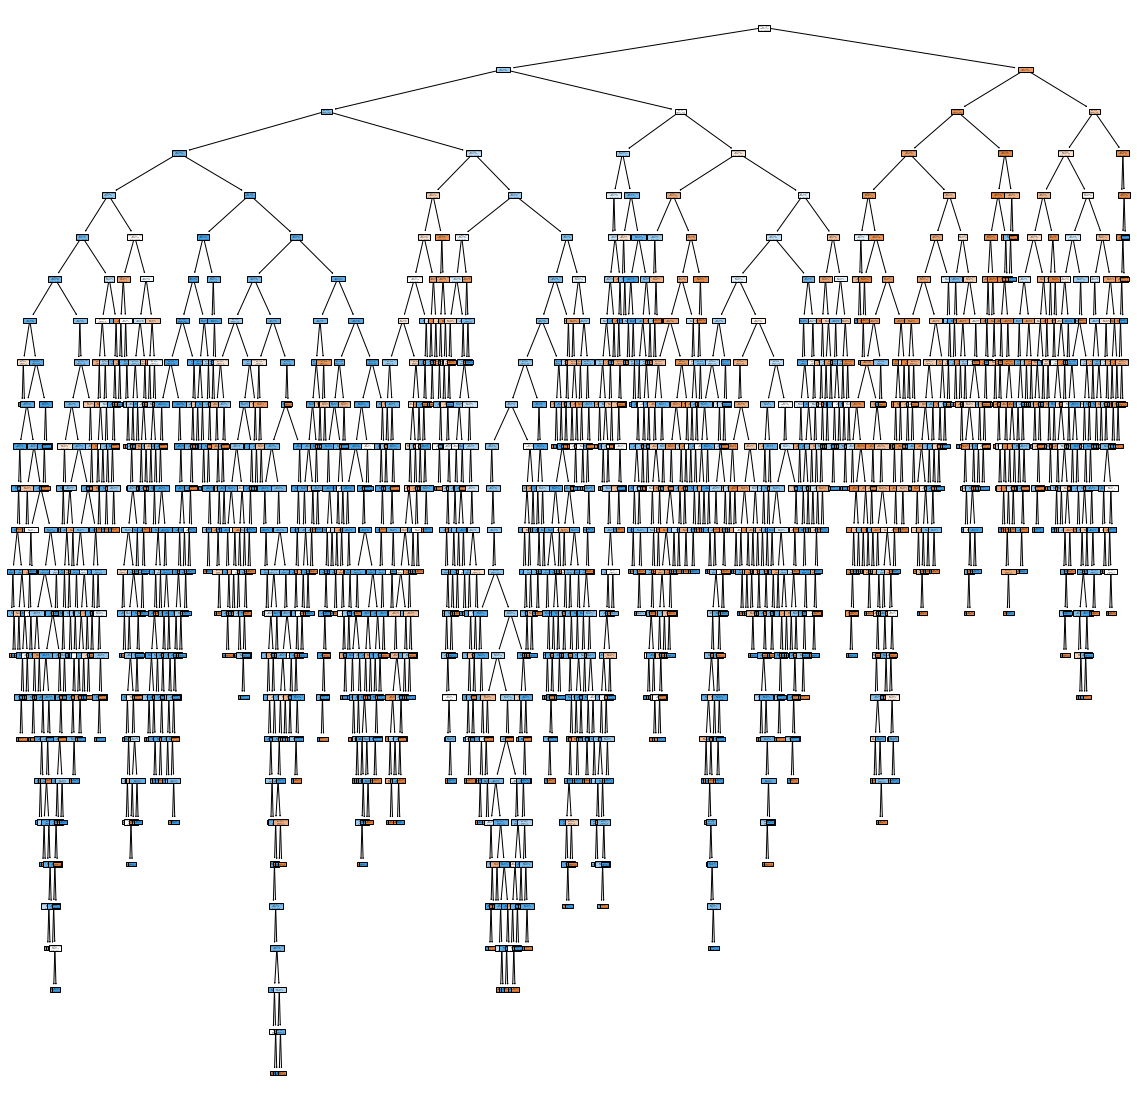

In [40]:
from sklearn import tree
#create a tree
features=X.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [41]:
#Test the model with 30% data 
Y_pred=dt.predict(X_test1)

In [42]:
#Genearte report
print(classification_report (Y_test1,Y_pred))
print(confusion_matrix(Y_test1,Y_pred))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72      1585
           1       0.75      0.54      0.63      1585

    accuracy                           0.68      3170
   macro avg       0.70      0.68      0.67      3170
weighted avg       0.70      0.68      0.67      3170

[[1300  285]
 [ 727  858]]


In [43]:
#here clearly understood , model is overfit . so reduced the 
#overfitting situation
#we use pruning technique 

In [44]:
#1.max_depth parameter
#Create object of DecisionTreeClassifier class and pass the parameter
#max_depth
dt1=DecisionTreeClassifier(max_depth=8,random_state=1)
#by default use inbuilt method gini index

In [45]:
dt1.fit(X_train1,Y_train1)

DecisionTreeClassifier(max_depth=8, random_state=1)

In [46]:
#Train the model with 70% data
dict={'Input columns':X.columns,'Information Gain':dt1.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values('Information Gain',ascending=False)

,Input columns,Information Gain
15,Contract,0.441773
2,MonthlyCharges,0.145952
1,tenure,0.112976
3,TotalCharges,0.081966
9,OnlineSecurity,0.067449
17,PaymentMethod,0.027531
8,InternetService,0.027497
7,MultipleLines,0.021146
14,StreamingMovies,0.011007
16,PaperlessBilling,0.009984


In [47]:
#Test the model with 30% data
Y_prde=dt1.predict(X_test1)

In [48]:
#Genearte report
print(classification_report (Y_test1,Y_pred))
print(confusion_matrix(Y_test1,Y_pred))


              precision    recall  f1-score   support

           0       0.64      0.82      0.72      1585
           1       0.75      0.54      0.63      1585

    accuracy                           0.68      3170
   macro avg       0.70      0.68      0.67      3170
weighted avg       0.70      0.68      0.67      3170

[[1300  285]
 [ 727  858]]


### Random Forest Tree

In [49]:
#call Random Forest Tree from Package
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc=RandomForestClassifier(n_estimators=12,max_features=5,random_state=1)

In [51]:
#Train the model
rfc.fit(X_train1,Y_train1)

RandomForestClassifier(max_features=5, n_estimators=12, random_state=1)

In [52]:
Y_pred=rfc.predict(X_test1)

In [53]:
#Genearte report
print(classification_report (Y_test1,Y_pred))
print(confusion_matrix(Y_test1,Y_pred))

              precision    recall  f1-score   support

           0       0.66      0.86      0.75      1585
           1       0.80      0.57      0.66      1585

    accuracy                           0.71      3170
   macro avg       0.73      0.71      0.71      3170
weighted avg       0.73      0.71      0.71      3170

[[1357  228]
 [ 686  899]]


### ADA Bosting

In [54]:
from sklearn.ensemble import AdaBoostClassifier

In [55]:
#creat an onject
ada=AdaBoostClassifier(n_estimators=10)

In [56]:
ada.fit(X_train1,Y_train1)

AdaBoostClassifier(n_estimators=10)

In [57]:
Y_pred=rfc.predict(X_test1)

In [58]:
#Genearte report
print(classification_report (Y_test1,Y_pred))
print(confusion_matrix(Y_test1,Y_pred))

              precision    recall  f1-score   support

           0       0.66      0.86      0.75      1585
           1       0.80      0.57      0.66      1585

    accuracy                           0.71      3170
   macro avg       0.73      0.71      0.71      3170
weighted avg       0.73      0.71      0.71      3170

[[1357  228]
 [ 686  899]]


### Extreem gradient boosting

In [59]:
from xgboost import XGBClassifier

In [60]:
xgc=XGBClassifier(n_estimators=25,reg_alpha=1)

In [61]:
xgc.fit(X_train1,Y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=25, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=1, reg_lambda=1, ...)

In [62]:
Y_pred=rfc.predict(X_test1)

In [63]:
#Genearte report
print(classification_report (Y_test1,Y_pred))
print(confusion_matrix(Y_test1,Y_pred))

              precision    recall  f1-score   support

           0       0.66      0.86      0.75      1585
           1       0.80      0.57      0.66      1585

    accuracy                           0.71      3170
   macro avg       0.73      0.71      0.71      3170
weighted avg       0.73      0.71      0.71      3170

[[1357  228]
 [ 686  899]]


### K-nn (KNeighborsClassifier) Algorithm

In [64]:
#Use K-NN Algorithm
from sklearn.neighbors import KNeighborsClassifier

In [65]:
#Create the object of KNeighborsClassifier
knc= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [66]:
knc.fit(X_train1,Y_train1)

KNeighborsClassifier()

In [67]:
Y_pred=rfc.predict(X_test1)

In [68]:
#Genearte report
print(classification_report (Y_test1,Y_pred))
print(confusion_matrix(Y_test1,Y_pred))

              precision    recall  f1-score   support

           0       0.66      0.86      0.75      1585
           1       0.80      0.57      0.66      1585

    accuracy                           0.71      3170
   macro avg       0.73      0.71      0.71      3170
weighted avg       0.73      0.71      0.71      3170

[[1357  228]
 [ 686  899]]


### Support Vector Machine Algorithm

In [69]:
#Apply Support vector machine
from sklearn.svm import LinearSVC

In [70]:
#Create object of LinearSVC class
ss.fit(X_train1,Y_train1)  #train the model with 70% data

StandardScaler()

In [71]:
Y_pred=rfc.predict(X_test1)

In [72]:
#Genearte report
print(classification_report (Y_test1,Y_pred))
print(confusion_matrix(Y_test1,Y_pred))

              precision    recall  f1-score   support

           0       0.66      0.86      0.75      1585
           1       0.80      0.57      0.66      1585

    accuracy                           0.71      3170
   macro avg       0.73      0.71      0.71      3170
weighted avg       0.73      0.71      0.71      3170

[[1357  228]
 [ 686  899]]


In [73]:
#create object of LinearSVC class
svc=LinearSVC(random_state=1) #Hard Margin by default means no outlier means no overfit 

In [74]:
#call function
def create_model(model):
    model.fit(X_train,Y_train)  #train the model with 70% data
    #test the model with 30% data
    Y_pred=model.predict(X_test)
    #generate Report
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1585
           1       0.63      0.57      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113

[[1406  179]
 [ 225  303]]


In [75]:
#Soft margin means to reduce overfitting situation means some error add on training time
#create object of LinearSVC class
svc1=LinearSVC(random_state=1,C=0.99) #soft margin

In [76]:
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1585
           1       0.63      0.57      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113

[[1406  179]
 [ 225  303]]


In [77]:
#Create object of SVC class on radial basis=rbf
from sklearn.svm import SVC 
svc2= SVC(random_state=1,kernel='rbf')

In [78]:
svc2=create_model(svc)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1585
           1       0.63      0.57      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113

[[1406  179]
 [ 225  303]]


In [79]:
#create object of SVC class 
svc1=SVC(random_state=1,kernel='poly')

In [80]:
#call function
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1585
           1       0.61      0.52      0.56       528

    accuracy                           0.80      2113
   macro avg       0.73      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113

[[1414  171]
 [ 255  273]]


### Naive Bayes Classifier Algorithm

In [81]:
from sklearn.naive_bayes import GaussianNB

In [82]:
#create the object of GaussianNB
#GaussianNB algorithm are applied on contineous Numerical value of input 
#column
gnb=GaussianNB()

In [83]:
#call function for train and test the model
gnb=create_model(gnb)

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1585
           1       0.52      0.78      0.62       528

    accuracy                           0.76      2113
   macro avg       0.71      0.77      0.73      2113
weighted avg       0.81      0.76      0.78      2113

[[1204  381]
 [ 118  410]]


In [84]:
from sklearn.naive_bayes import MultinomialNB
#inbuilt class MultinomialNB

In [85]:
#create object of class MultinomialNB
mnb=MultinomialNB()

In [86]:
#call function for train and test the model
mnb=create_model(gnb)

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1585
           1       0.52      0.78      0.62       528

    accuracy                           0.76      2113
   macro avg       0.71      0.77      0.73      2113
weighted avg       0.81      0.76      0.78      2113

[[1204  381]
 [ 118  410]]


### Conclusion:
By Performing training through various algorithms we can clearly see that the model is well trained using Logisitic Regression Algorithm. The precision score in all the remaining algorith is low comparatively to what we have achieved through Logisitic Regression. So we can conclude that logisitc regression is the best algorithm to predict the output